### Importação de Bibliotecas

- `pandas`: Biblioteca para manipulação eficiente de dados tabulares. Fornece estruturas de dados como `DataFrame` para facilitar o tratamento de informações estruturadas.
- `matplotlib.pyplot`: Utilizada para visualização de dados. Permite a criação de gráficos diversos, incluindo linhas, barras e histogramas.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Leitura e Definição das Colunas do Dataset  

O código abaixo **carrega o arquivo `googleplaystore.csv` e define os nomes das colunas** para padronizar a estrutura do `DataFrame`.  

- **Utiliza `pd.read_csv()`** para ler o arquivo CSV, garantindo que todos os dados sejam tratados como string (`dtype=str`).  
- **Define `sep=","` e `quotechar='"'`** para garantir que os campos sejam separados corretamente, mesmo se houver aspas dentro dos valores.  
- **`engine="python"` é usado para compatibilidade** com diferentes formatos de arquivos CSV.  
- **`on_bad_lines="skip"`** ignora linhas mal formatadas para evitar falhas na leitura.  
- **`header=None`** impede que a primeira linha seja interpretada como cabeçalho, garantindo que todas as linhas sejam lidas como dados.  
- **Define manualmente os nomes das colunas (`df.columns = [...]`)** para garantir a correta identificação dos campos no `DataFrame`. 

In [2]:
file_path = "../googleplaystore.csv"
df = pd.read_csv(file_path, sep=",", quotechar='"', dtype=str, engine="python", on_bad_lines="skip", header=None)

# Definição das colunas
df.columns = [
    "App", "Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price", 
    "Content Rating", "Genres", "Last Updated", "Current Ver", "Android Ver"
]

### Geração de Relatório: Diagnóstico Completo das Colunas  

O código abaixo **gera um relatório `.txt` contendo um diagnóstico detalhado de cada coluna do DataFrame**.  

- **Cria um arquivo de saída (`arquivo_saida`)** para armazenar os resultados.  
- **Para cada coluna do DataFrame**, registra no relatório:  
- Nome da coluna.  
- Todos os valores distintos, **ordenados alfabeticamente** (ignorando maiúsculas/minúsculas).  
- Quantidade de vezes que cada valor aparece (**frequência**).  
- Inclui valores `NaN`, caso existam.  
- **Utiliza `value_counts(dropna=False)`** para contabilizar os valores, garantindo que valores ausentes sejam considerados.  
- **Ordena os valores ignorando diferenças entre maiúsculas e minúsculas** (`key=lambda x: x.str.lower()`).  
- **Escreve os valores no arquivo de saída**, separando cada coluna com um cabeçalho e espaçamento adequado.  

Ao final, o código imprime a confirmação da geração do relatório.

In [3]:
def diagnostico_completo(df, arquivo_saida="relatorio_completo.txt"):
    """
    Para cada coluna do DataFrame, cria um relatório .txt que mostra:
      - O nome da coluna,
      - Todos os valores distintos (sem repetições) em ordem alfabética (ignorando maiúsculas e minúsculas),
      - Quantas vezes cada valor aparece (frequência),
      - Incluindo NaN, caso exista.
    """
    with open(arquivo_saida, "w", encoding="utf-8") as rel:
        for col in df.columns:
            rel.write(f"=== COLUNA: {col} ===\n")
            
            # Contagem de cada valor distinto, incluindo NaN
            contagem = df[col].value_counts(dropna=False)
            
            # Converte em DataFrame para ordenar alfabeticamente ignorando maiúsculas/minúsculas
            contagem_df = contagem.reset_index()
            contagem_df.columns = ["valor", "frequencia"]  # renomeando para clarificar
            
            # Cria coluna auxiliar para ordenar ignorando maiúsculas/minúsculas
            contagem_df["valor_str"] = contagem_df["valor"].astype(str)
            contagem_df.sort_values(by="valor_str", 
                                    key=lambda x: x.str.lower(), 
                                    inplace=True)
            
            # Escreve cada valor e sua frequência
            for _, row in contagem_df.iterrows():
                valor_impressao = row["valor"]
                freq = row["frequencia"]
                rel.write(f"- Valor: {valor_impressao}, Repete: {freq} vezes\n")
            
            rel.write("\n")  # linha em branco separando as colunas

    print(f"Relatório gerado: {arquivo_saida}")

diagnostico_completo(df, "../relatorio_valores_distintos.txt")

Relatório gerado: ../relatorio_valores_distintos.txt


### Limpeza e Padronização dos Dados  

O código abaixo realiza a **remoção de duplicatas e a padronização dos dados** para garantir que as colunas numéricas estejam no formato correto.  

- **Remove registros duplicados**, mantendo a última ocorrência válida.  
- **Limpa valores não numéricos** das colunas `"Installs"` e `"Price"`.  
- **Converte `"Installs"`, `"Price"` e `"Reviews"` para valores numéricos**, substituindo valores inválidos por `NaN`.  
- **Utiliza expressões regulares (`regex=True`)** para manter apenas os números relevantes em cada coluna.  


In [4]:
# Remover linhas duplicadas considerando todas as colunas, exceto "Last Updated"
df.drop_duplicates(subset=["App", "Category", "Rating", "Reviews", "Size", "Installs", "Type", "Price", 
                           "Content Rating", "Genres", "Current Ver", "Android Ver"], keep="last", inplace=True)

# Limpeza da coluna "Installs"
df["Installs"] = df["Installs"].str.replace("[^0-9]", "", regex=True)
df["Installs"] = pd.to_numeric(df["Installs"], errors="coerce")

# Limpeza da coluna "Price"
df["Price"] = df["Price"].str.replace("[^0-9.]", "", regex=True)
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")

# Conversão da coluna "Reviews" para numérico
df["Reviews"] = pd.to_numeric(df["Reviews"], errors="coerce")

## Top 5 Apps por Número de Instalações

O código abaixo **gera um gráfico de barras que exibe os 5 aplicativos com maior número de instalações**, com ajustes visuais para melhor apresentação.

### Especificações do Gráfico:
- **Seleção dos dados**: Os 5 aplicativos com mais instalações são extraídos (`df.nlargest(5, "Installs")`).
- **Tipo de visualização**: Gráfico de barras (`plt.bar()`).
- **Paleta de cores**: Barras com cores distintas para melhor diferenciação (`color=['#00FFAA', '#FF5733', '#FFD700', '#1E90FF', '#9B59B6']`).
- **Bordas destacadas**: `edgecolor='white'` para maior contraste com o fundo escuro.
- **Texto e rótulos**: Ajustados para melhor legibilidade (`color='white'`).
- **Grade de apoio**: Linhas discretas no eixo `y` (`plt.grid()` com `color='gray', alpha=0.5`).
- **Exibição de valores**: O número de instalações é posicionado acima de cada barra para melhor referência.

### Estilo Dark:
- **Fundo escuro** (`plt.style.context('dark_background')`) para maior contraste.
- **Cores vibrantes** que mantêm a distinção entre os elementos.
- **Rótulos e títulos claros** para facilitar a leitura.

O gráfico exibe os aplicativos mais instalados, permitindo a análise da popularidade com base na quantidade de downloads.

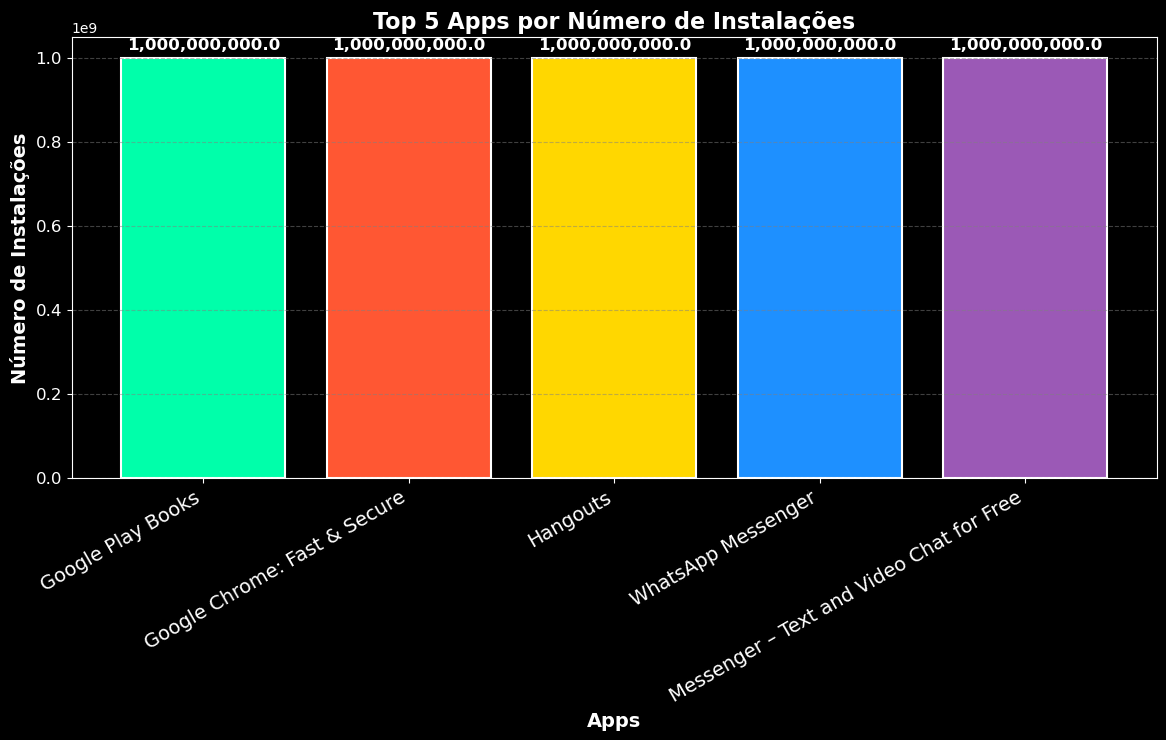

In [5]:
# Selecionar os 5 apps com mais instalações
top_5_installs = df.nlargest(5, "Installs")

# Cores para cada barra
colors = ['#00FFAA', '#FF5733', '#FFD700', '#1E90FF', '#9B59B6']

# Gráfico estilizado com fundo dark
with plt.style.context('dark_background'):
    plt.figure(figsize=(14, 7))  

    # Gráfico de barras
    plt.bar(top_5_installs["App"], top_5_installs["Installs"], color=colors, edgecolor='white', linewidth=1.5)

    # Rótulos e título
    plt.xlabel("Apps", color='white', fontsize=14, fontweight='bold')
    plt.ylabel("Número de Instalações", color='white', fontsize=14, fontweight='bold')
    plt.title("Top 5 Apps por Número de Instalações", color='white', fontsize=16, fontweight='bold')

    # Rotação dos rótulos do eixo X
    plt.xticks(rotation=30, ha='right', fontsize=14, color='white')
    plt.yticks(fontsize=12, color='white')

    # Grid discreto
    plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')

    # Números acima das barras para destacar valores
    for i, v in enumerate(top_5_installs["Installs"]):
        plt.text(i, v + (v * 0.02), f'{v:,}', ha='center', fontsize=12, color='white', fontweight='bold')

    # Espaçamento inferior para evitar corte dos rótulos
    plt.subplots_adjust(bottom=0.25)

    # Gráfico
    plt.show()

## Distribuição de Apps por Categoria

O código abaixo **gera um gráfico de pizza para representar a distribuição dos aplicativos por categoria**, com ajustes visuais para melhor apresentação.

### 🔹 Especificações do Gráfico:
- **Contagem de categorias**: Os aplicativos são agrupados por categoria (`df["Category"].value_counts()`).
- **Cálculo percentual**: Conversão das contagens para porcentagem relativa (`(category_counts / total_apps * 100).round(1)`).
- **Exibição das categorias mais representativas**: As **12 principais categorias** são destacadas individualmente, e as demais são agrupadas como "Outras".
- **Tipo de visualização**: Gráfico de pizza (`plt.pie()`).
- **Paleta de cores**: Utilização de `plt.cm.plasma` para criar contraste entre as categorias.
- **Bordas destacadas**: `edgecolor='white'` para melhor separação dos segmentos.
- **Texto e rótulos**: Ajustes para melhor legibilidade (`color='white'`).
- **Informação complementar**: Texto adicional detalhando as categorias agrupadas em "Outras".
- **Layout otimizado**: Evita sobreposição de rótulos e melhora a disposição visual.

### Estilo Dark:
- **Fundo escuro** (`plt.style.context('dark_background')`) para melhor contraste.
- **Cores vibrantes** que se destacam no tema escuro.
- **Texto claro** (`color='white'`) para garantir legibilidade.

O gráfico apresenta uma visão organizada da distribuição de categorias, facilitando a análise do mercado.


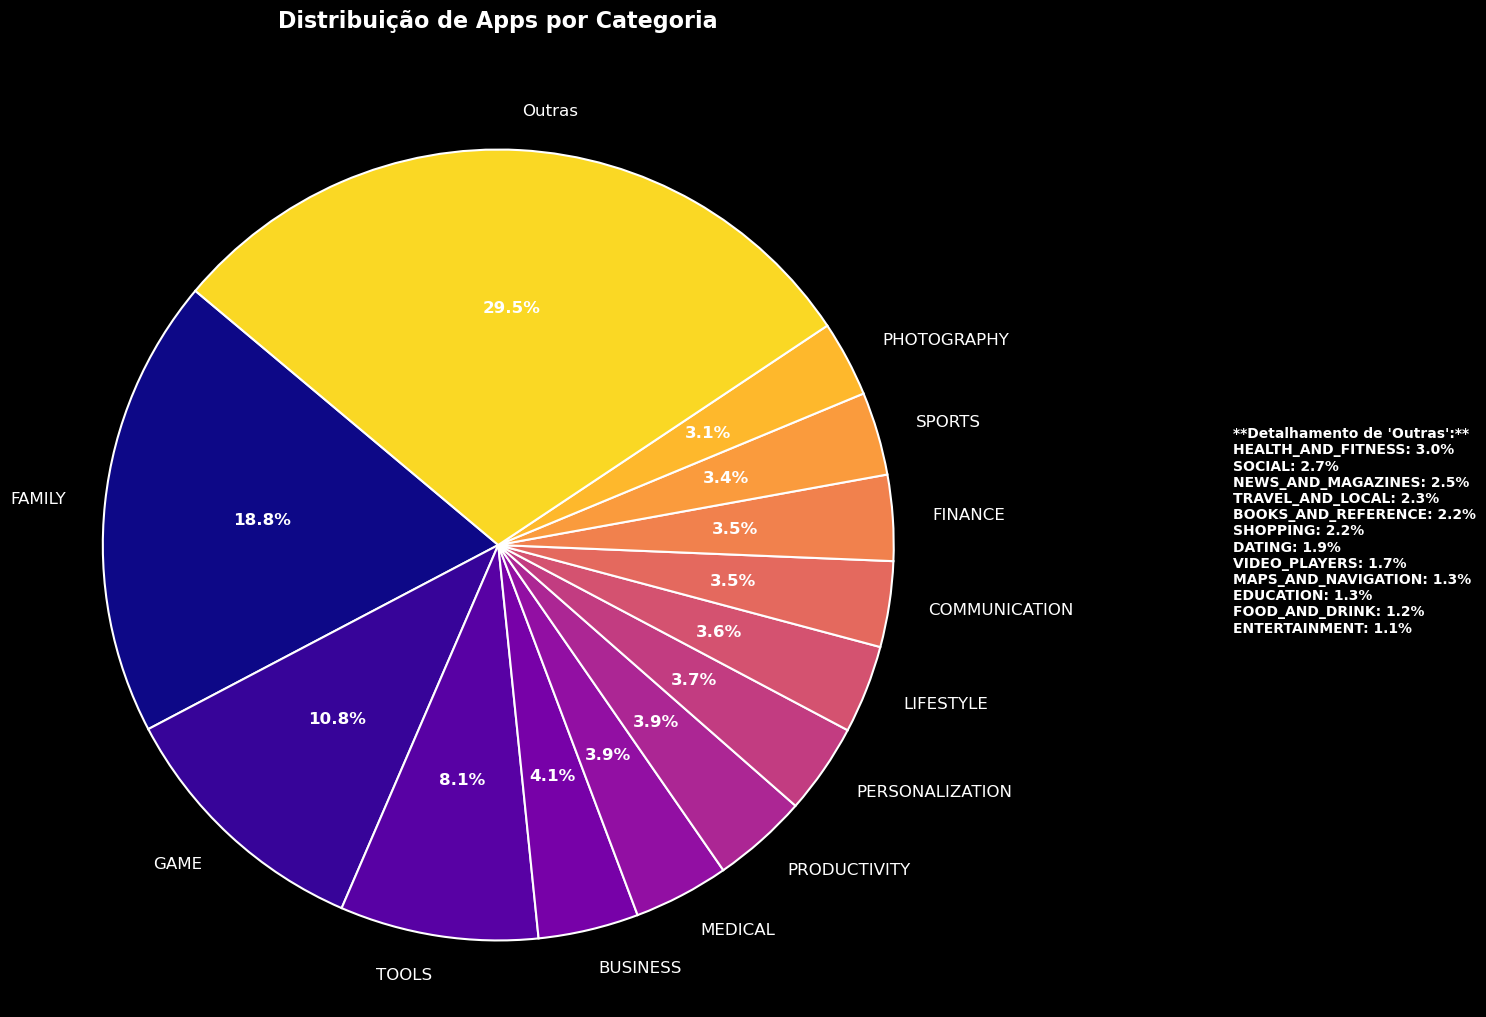

In [6]:
# Contagem de categorias
category_counts = df["Category"].value_counts()
total_apps = len(df)
percentages = (category_counts / total_apps * 100).round(1)

# Definição do limite de categorias antes de agrupar como "Outras"
num_top_categories = 12  
top_categories = percentages[:num_top_categories]  
others_sum = percentages[num_top_categories:].sum()

# Adiciona a categoria "Outras" se houver categorias restantes
if others_sum > 0:
    top_categories["Outras"] = others_sum

# Paleta de cores dark
colors = [plt.cm.plasma(i / len(top_categories)) for i in range(len(top_categories))]

# Gráfico de pizza com tema dark
with plt.style.context('dark_background'):
    plt.figure(figsize=(12, 12))

    wedges, texts, autotexts = plt.pie(
        top_categories, labels=top_categories.index, autopct='%1.1f%%',
        startangle=140, colors=colors, wedgeprops={'edgecolor': 'white', 'linewidth': 1.5},
        textprops={'fontsize': 12, 'color': 'white'}
    )

    # Tamanho dos textos de porcentagem
    for autotext in autotexts:
        autotext.set_fontsize(12)
        autotext.set_color('white')
        autotext.set_fontweight('bold')

    # Título estilizado
    plt.title("Distribuição de Apps por Categoria", fontsize=16, fontweight='bold', color='white', pad=40)

    # Texto com detalhes de "Outras"
    others = category_counts[num_top_categories:]  
    others_text = "**Detalhamento de 'Outras':**\n"
    for cat, value in others.items():
        percentage = (value / len(df)) * 100
        if percentage >= 1.0:  # Mostra apenas categorias com mais de 1%
            others_text += f"{cat}: {percentage:.1f}%\n"

    # Texto informativo ao lado do gráfico
    plt.figtext(1.1, 0.5, others_text, fontsize=10, va='center', color='white', fontweight='bold')

    # Layout para acomodar o texto
    plt.subplots_adjust(right=0.85)

    # Formato circular
    plt.axis("equal")  

    # Gráfico
    plt.show()

### Identificação do App Mais Caro e Contagem de Apps 'Mature 17+'

O código abaixo **identifica o app mais caro e conta quantos apps possuem classificação 'Mature 17+'**.

- **Localiza o app mais caro** utilizando `idxmax()`, que retorna o índice do maior valor na coluna `"Price"`.
- **Exibe o nome e o preço do app mais caro** com `print()`.
- **Filtra os apps com `"Content Rating" == 'Mature 17+'`** e conta a quantidade total com `.shape[0]`.
- **Exibe a quantidade de apps 'Mature 17+'** no console.

In [7]:
# **App mais caro**
most_expensive_app = df.loc[df["Price"].idxmax()]
print(f"O app mais caro é '{most_expensive_app['App']}' custando ${most_expensive_app['Price']}")

# **Número de apps 'Mature 17+'**
mature_count = df[df["Content Rating"] == "Mature 17+"].shape[0]
print(f"Número de apps classificados como 'Mature 17+': {mature_count}")

O app mais caro é 'I'm Rich - Trump Edition' custando $400.0
Número de apps classificados como 'Mature 17+': 447


## Top 10 Apps por Número de Reviews

O código abaixo **gera um gráfico de barras que exibe os 10 aplicativos distintos com maior número de avaliações**, com ajustes visuais para melhor legibilidade.

### Especificações do Gráfico:
- **Seleção dos dados**: Os 10 aplicativos com mais avaliações são selecionados (`df.sort_values(by="Reviews", ascending=False).drop_duplicates(subset=["App"]).head(10)`).
- **Tipo de visualização**: Gráfico de barras (`plt.bar()`).
- **Paleta de cores**: Barras com tonalidade diferenciada (`color='#00FFAA'`) para realce.
- **Bordas destacadas**: `edgecolor='white'` para melhor separação visual.
- **Texto e rótulos**: Ajustados para melhor legibilidade (`color='white'`).
- **Grade de apoio**: Linhas discretas no eixo `y` (`plt.grid()` com `color='gray', alpha=0.5`).
- **Exibição de valores**: O número de avaliações é posicionado acima de cada barra para melhor referência.

### Estilo Dark:
- **Fundo escuro** (`plt.style.context('dark_background')`) para maior contraste.
- **Elementos visuais em cores claras** para melhor distinção.
- **Rótulos ajustados** para manter a clareza da informação.

O gráfico apresenta os aplicativos mais avaliados de forma clara, permitindo a análise das preferências dos usuários com base na quantidade de avaliações recebidas.


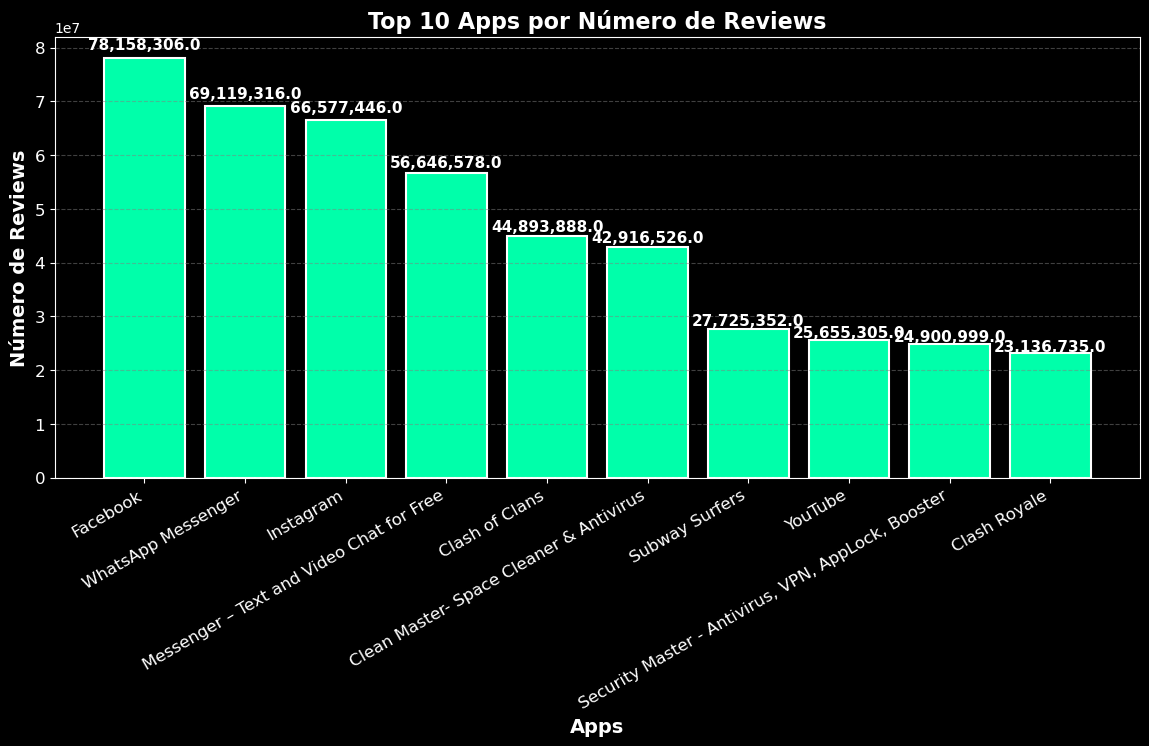

In [8]:
# Selecionar os 10 apps distintos com mais reviews
top_10_reviews = df.sort_values(by="Reviews", ascending=False).drop_duplicates(subset=["App"]).head(10)

# Criar um contexto temporário para aplicar o estilo dark apenas nesse gráfico
with plt.style.context('dark_background'):
    plt.figure(figsize=(14, 7))

    # Gráfico de barras com efeito visual moderno
    plt.bar(top_10_reviews["App"], top_10_reviews["Reviews"], color='#00FFAA', edgecolor='white', linewidth=1.5)

    # Rótulos e título para melhor legibilidade
    plt.xlabel("Apps", color='white', fontsize=14, fontweight='bold')
    plt.ylabel("Número de Reviews", color='white', fontsize=14, fontweight='bold')
    plt.title("Top 10 Apps por Número de Reviews", color='white', fontsize=16, fontweight='bold')

    # Visibilidade dos rótulos no eixo X
    plt.xticks(rotation=30, ha='right', fontsize=12, color='white')
    plt.yticks(fontsize=12, color='white')

    # Espaçamento inferior para evitar corte dos rótulos
    plt.subplots_adjust(bottom=0.25)

    # Grid discreto e estilizado para melhor leitura
    plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')

    # Efeito sutil de sombra para destacar as barras
    for i, v in enumerate(top_10_reviews["Reviews"]):
        plt.text(i, v + (v * 0.02), f'{v:,}', ha='center', fontsize=11, color='white', fontweight='bold')

    # Exibir o gráfico
    plt.show()

## Cálculo Adicional 1: Média de Instalações por Categoria

O código abaixo **gera um gráfico de barras para representar a média de instalações por categoria**, com ajustes visuais para melhor apresentação.

### 🔹 Especificações do Gráfico:
- **Agrupamento de dados**: Cálculo da média de instalações por categoria (`df.groupby("Category")["Installs"].mean()`).
- **Ordenação dos valores**: Exibição das categorias com maior média de instalações em ordem decrescente.
- **Tipo de visualização**: Gráfico de barras (`plt.bar()`).
- **Paleta de cores**: Utiliza `color='deepskyblue'` para maior destaque e contraste com o fundo escuro.
- **Destaque das bordas**: Utilização de `edgecolor='white'` para melhor definição das barras.
- **Texto e rótulos**: Ajustes no tamanho e coloração para melhor legibilidade (`color='white'`).
- **Grade de apoio**: Estilo discreto no eixo `y` (`plt.grid()` com `color='gray', alpha=0.5`).
- **Ajuste de espaçamento**: Evita sobreposição dos rótulos no eixo X (`rotation=30, ha='right'`).
- **Estilo Dark**: `plt.style.use('dark_background')`.

O gráfico fornece uma visão clara das categorias de aplicativos com maior volume médio de instalações, permitindo uma análise eficiente das tendências de mercado.


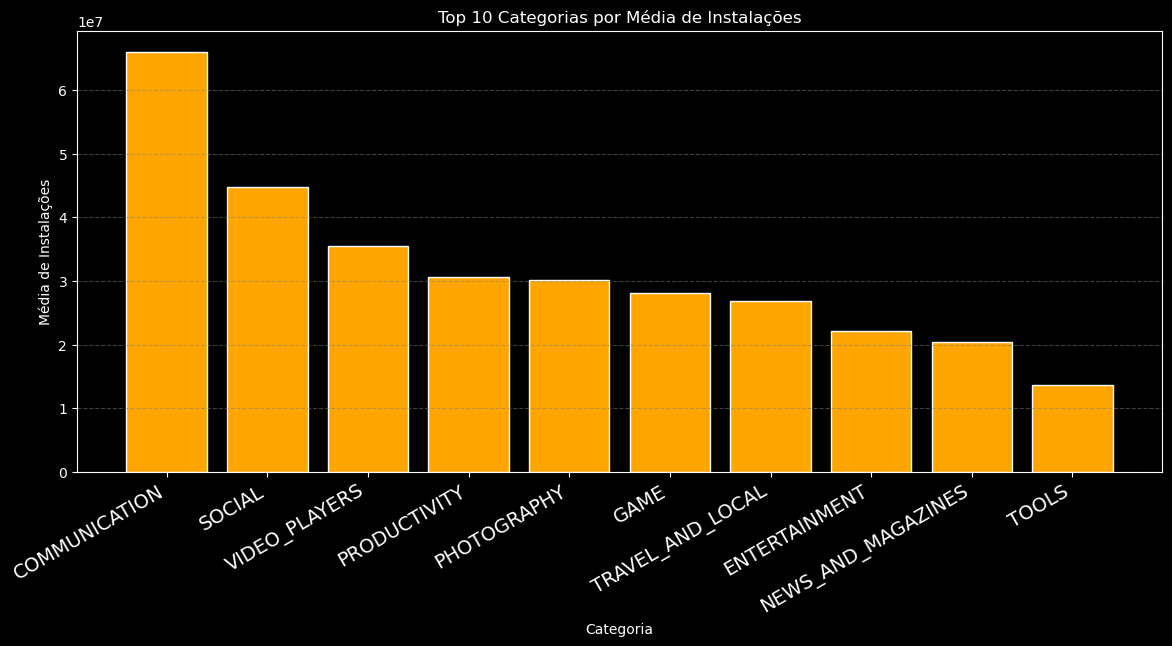

In [9]:
# Agrupar e calcular a média de instalações por categoria
mean_installs_by_category = df.groupby("Category")["Installs"].mean().sort_values(ascending=False)

# Contexto temporário para aplicar o estilo dark nesse gráfico
with plt.style.context('dark_background'):
    plt.figure(figsize=(14, 7))  # Ajuste do tamanho da figura
    plt.bar(mean_installs_by_category.index[:10], mean_installs_by_category.values[:10], color='orange', edgecolor='white')

    # Ajustando rótulos para melhor visibilidade
    plt.xlabel("Categoria", color='white')
    plt.ylabel("Média de Instalações", color='white')
    plt.title("Top 10 Categorias por Média de Instalações", color='white')

    # Rotação dos rótulos do eixo X para evitar cortes e sobreposição
    plt.xticks(rotation=30, ha='right', fontsize=14, color='white')
    plt.yticks(color='white')

    # Adicionando padding extra no bottom para evitar corte dos nomes
    plt.subplots_adjust(bottom=0.25)

    # Adicionando grid discreto
    plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')

    # Exibir o gráfico
    plt.show()


## Cálculo Adicional 2: Distribuição de Preços dos Apps Pagos

O código abaixo **gera um histograma da distribuição de preços dos aplicativos pagos**, com ajustes visuais para melhor legibilidade.

### 🔹 Especificações do Gráfico:
- **Filtragem de dados**: Apenas aplicativos pagos (`Price > 0`).
- **Tipo de visualização**: Histograma (`plt.hist()`) com **20 intervalos** (`bins=20`).
- **Paleta de cores**: Utiliza `color='deepskyblue'` para contraste.
- **Destaque das barras**: Bordas brancas (`edgecolor='white'`) para melhor visibilidade.
- **Texto e rótulos**: Ajustes na coloração e legibilidade dos elementos textuais.
- **Grade de apoio**: Estilo discreto (`plt.grid()` com `color='gray', alpha=0.5`).
- **Estilo Dark**: `plt.style.use('dark_background')`.

A estrutura do gráfico permite uma interpretação clara da distribuição dos valores, facilitando a análise dos preços praticados nos aplicativos pagos.

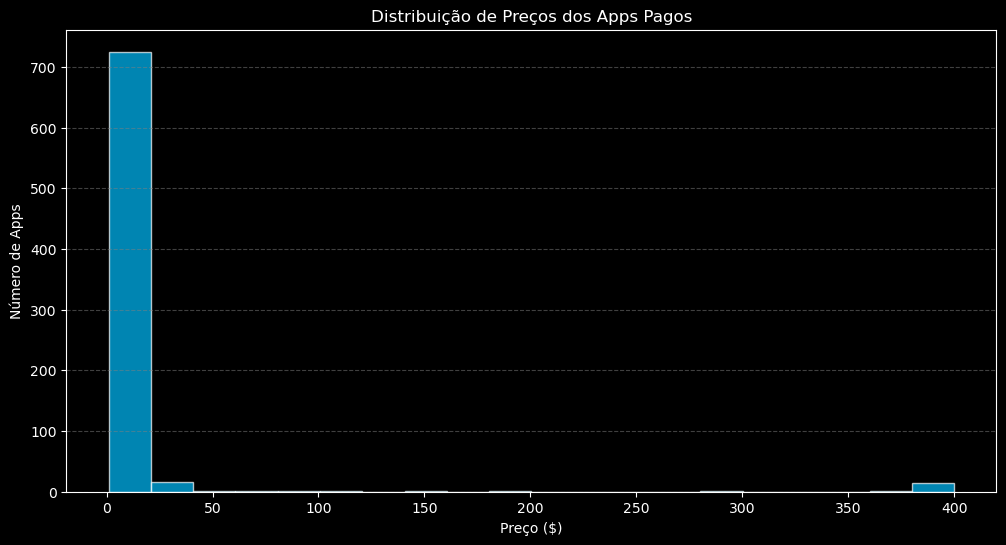

In [10]:
# Aplicar o estilo dark
plt.style.use('dark_background')

# Filtrar apenas os apps pagos
paid_apps = df[df["Price"] > 0]

# Criar o histograma
plt.figure(figsize=(12, 6))
plt.hist(paid_apps["Price"], bins=20, color='deepskyblue', alpha=0.7, edgecolor='white')  # Alterei a cor para melhor contraste

# Adicionar rótulos e título
plt.xlabel("Preço ($)", color='white')
plt.ylabel("Número de Apps", color='white')
plt.title("Distribuição de Preços dos Apps Pagos", color='white')

# Melhor visualização no fundo escuro
plt.grid(axis='y', linestyle='--', alpha=0.5, color='gray')

# Exibir o gráfico
plt.show()
